# Yearly Trends

This notebook is focused on looking at the yearly trends from 2011-2019 for average daily vehicle count, truck weight and average daily platoon count for each year.  

In [48]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=13)

In [2]:
stations = ['Ceneri', 'Denges', 'Gotthard']

In [32]:
def yearly_daily_vehicle(station):
    df = pd.read_pickle('{}Data/2011_2019_datetime.pkl'.format(station))
    
    df['Year'] = df.Date.dt.year
    df['Weekday'] = df.Date.dt.weekday
    df['Date_d'] = df.Date.dt.date
    
    #Remove saturday and sunday as they have been shown to be radically different
    df = df[~df.Weekday.isin([5,6])]
    
    
    df = df.groupby(['Year']).agg({'Date_d': lambda x: x.nunique(), 'Date': 'count'}) #Total days by weekday represented
    
    #Normalizing
    df_norm_year = df['Date']/df['Date_d']
    
    ab_max = df_norm_year.max()
    
    ax = df_norm_year.plot(title="{} weekday average vehicle count".format(station))
    ax.set_ylim(0, (ab_max + 500))
    ax.set_ylabel('Average weekday daily count')
    plt.show()

In [46]:
def yearly_weight(station, violin):
    df = pd.read_pickle('{}Data/2011_2019_datetime.pkl'.format(station))
    
    df['Year'] = df.Date.dt.year
    df['Weight'] = df.GW_TOT/1000
    df['Weekday'] = df.Date.dt.weekday

    #Remove saturday and sunday as they have been shown to be radically different
    df = df[~df.Weekday.isin([5,6])]

    av_weight = df.groupby('Year').Weight.mean()
    ab_max = av_weight.max()
    
    if violin:
        fig, axes = plt.subplots()
        sns.violinplot('Year', 'Weight', data=df, ax=axes)
        
        
        axes.set_title('{} Weight Distribution by Year'.format(station))
        axes.yaxis.grid(True)
        axes.set_xlabel('Year')
        axes.set_ylabel('Total Weight (tons)')

        plt.show()
        
    else:


        ax = av_weight.plot(title="{} average vehicle weight".format(station))
        ax.set_ylabel('Weight (tons)')
        ax.set_ylim(0, (ab_max + 2))
        plt.show()

In [53]:
def yearly_platoon(station):
    #This function investigates the daily occurances of daily platoon counts by year
        
    #Get the platoon data
    df_platoon = pd.read_pickle('{}Data/2011_2019_platoon.pkl'.format(station))
    df_platoon = df_platoon[df_platoon.Length > 1] #Only keep platoons that are at least of length 2
    df_platoon['Weekday'] = df_platoon.Start.dt.weekday
    df_platoon['Hour'] = df_platoon.Start.dt.hour
    df_platoon['Date_d'] = df_platoon.Start.dt.date
    df_platoon['DoY'] = df_platoon.Start.dt.dayofyear
    df_platoon['Year'] = df_platoon.Start.dt.year

    
    #Get the general truck data for normalization
    df_truck = pd.read_pickle('{}Data/2011_2019_datetime.pkl'.format(station))
    df_truck['Weekday'] = df_truck.Date.dt.weekday
    df_truck['Hour'] = df_truck.Date.dt.hour
    df_truck['Date_d'] = df_truck.Date.dt.date
    df_truck['DoY'] = df_truck.Date.dt.dayofyear
    df_truck['Year'] = df_truck.Date.dt.year

    df_platoon_hour = df_platoon.groupby(['Year']).Start.count().reset_index().rename(columns={'Start':'count'}) #Total count by weekday/hour
    
    df_truck_date = df_truck.groupby(['Year'])['Date_d'].nunique().reset_index().rename(columns={'Date_d':'date_count'}) #Total days by weekday represented
    df_platoon_grouped = df_truck_date.merge(df_platoon_hour, on='Year')
    df_platoon_grouped = df_platoon_grouped.set_index('Year')
    
    #Normalizing
    df_platoon_grouped['norm_count'] = df_platoon_grouped['count']/df_platoon_grouped['date_count']
    
    #Plotting
    df_platoon_grouped.norm_count.plot(title="{} Daily Normalized Natural Truck Platoon with at least 2".format(station))
    plt.show()

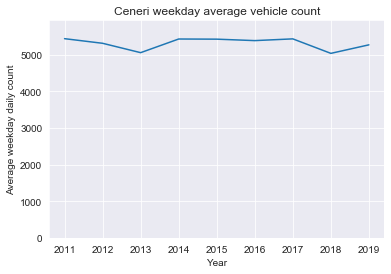

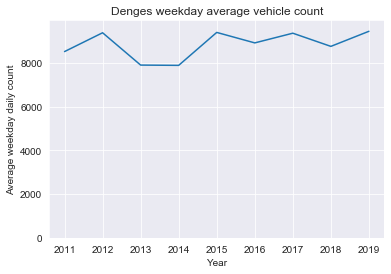

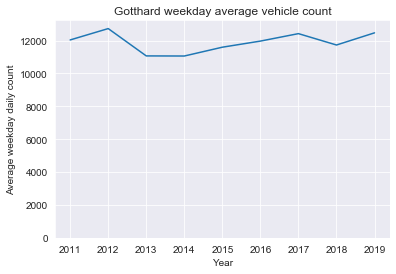

In [33]:
for station in stations:
    yearly_daily_vehicle(station)

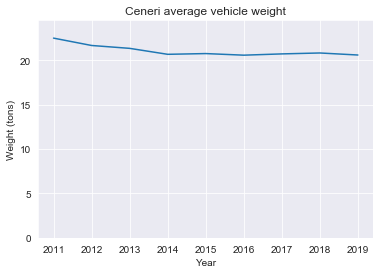

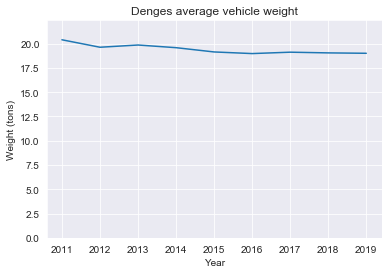

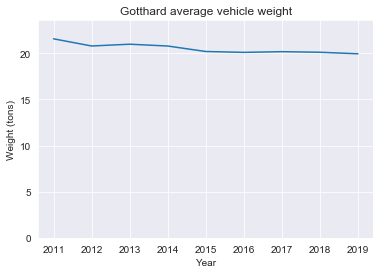

In [31]:
for station in stations:
    yearly_weight(station)

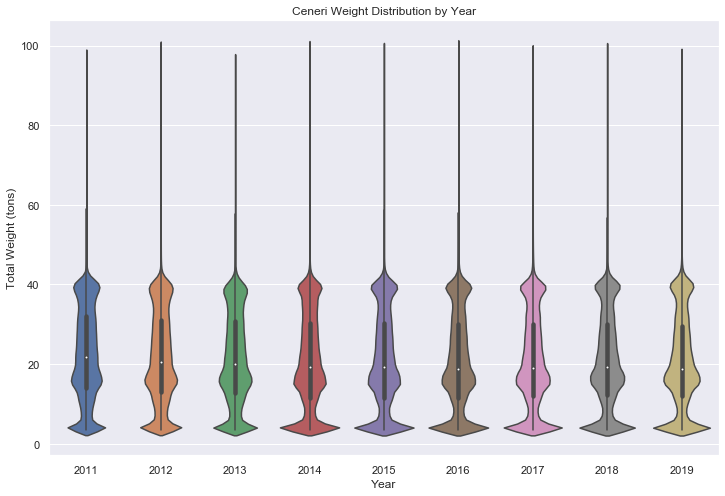

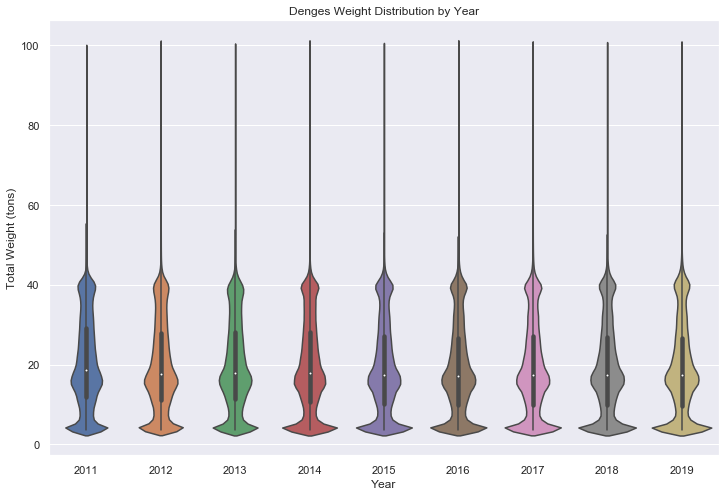

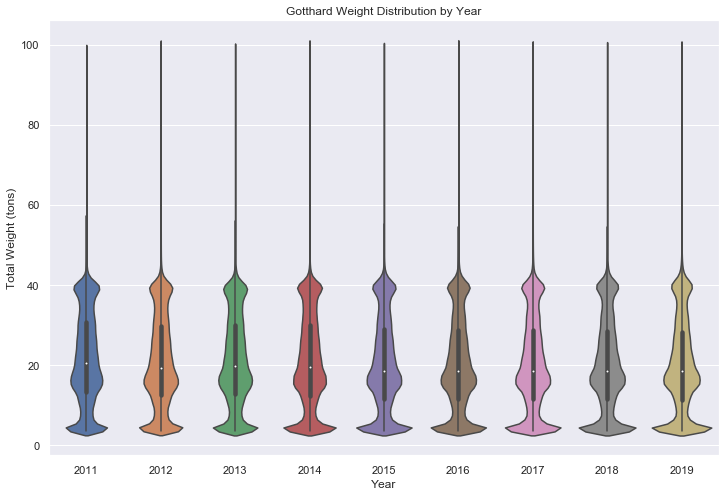

In [49]:
for station in stations:
    yearly_weight(station)

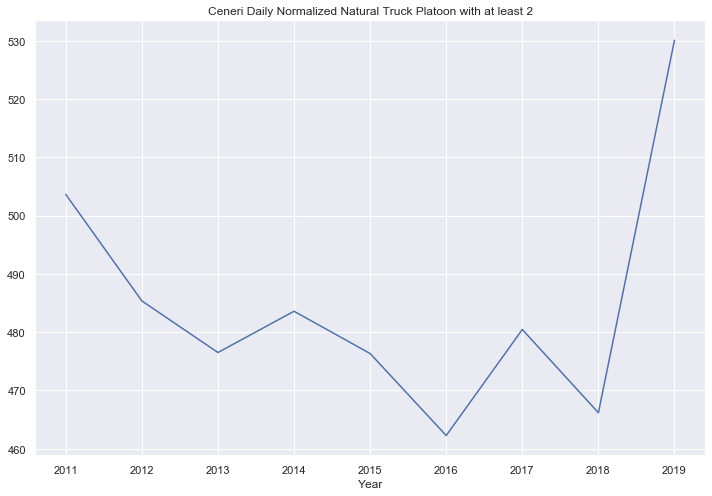

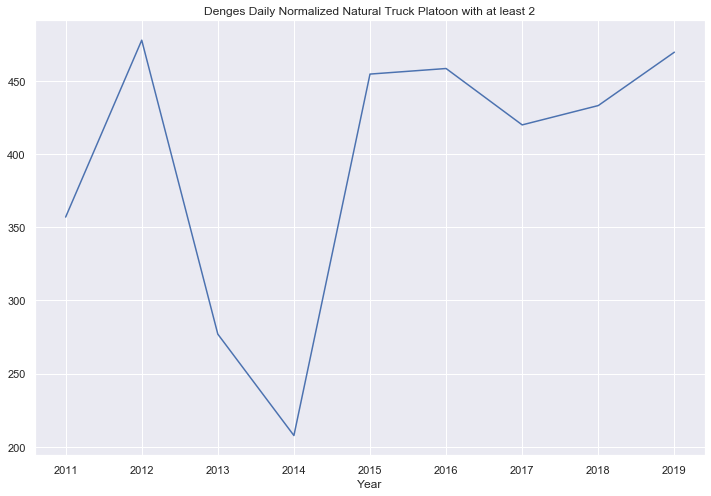

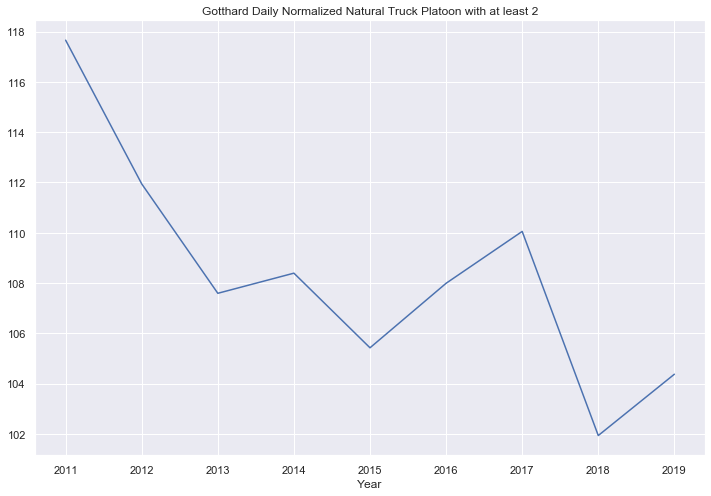

In [54]:
for station in stations:
    yearly_platoon(station)